<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats as st

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Данные
Предоставлены данные о покупках из трёх разных интернет магазинов. Необходимо предсказать, кто из клиентов сделает в ближайший месяц покупку.

In [3]:
# Загрузка файла с данными
apparel_purchases = pd.read_csv('apparel-purchases.csv', parse_dates=['date'])
gifts_purchases = pd.read_csv('gifts-purchases.csv', parse_dates=['date'])
marketplace_purchases = pd.read_csv('marketplace-purchases.csv', parse_dates=['created_at'])

In [4]:
apparel_purchases.head()

,client_id,quantity,price,date,message_id,recommended_by
0,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
1,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
2,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
3,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
4,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message


In [5]:
apparel_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133104 entries, 0 to 133103
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   client_id       133104 non-null  int64         
 1   quantity        133104 non-null  int64         
 2   price           133104 non-null  float64       
 3   date            133104 non-null  datetime64[ns]
 4   message_id      133104 non-null  object        
 5   recommended_by  133104 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.1+ MB


In [6]:
gifts_purchases.head()

,client_id,quantity,price,date,message_id,recommended_by
0,1515915625803894158,1,8943.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
1,1515915625803894158,1,46369.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
2,1515915625803894158,1,4666.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
3,1515915625803894158,1,11963.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
4,1515915625803894158,1,13107.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message


In [7]:
gifts_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       811 non-null    int64         
 1   quantity        811 non-null    int64         
 2   price           811 non-null    float64       
 3   date            811 non-null    datetime64[ns]
 4   message_id      811 non-null    object        
 5   recommended_by  811 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 38.1+ KB


In [8]:
marketplace_purchases.head()

,client_id,quantity,price,message_id,created_at,date
0,1515915625440944408,1,6298.0,1515915625440944408-1752-6450b79616277,2023-05-02,2023-05-02 08:49:57
1,1515915625440992498,1,7318.0,1515915625440992498-1818-646b35d089c98,2023-05-22,2023-05-22 13:52:13
2,1515915625441026424,1,65798.0,1515915625441026424-1802-64634e24a2cb9,2023-05-17,2023-05-17 11:21:04
3,1515915625441118180,1,5598.0,1515915625441118180-1820-646c9444ebf39,2023-05-23,2023-05-23 19:02:53
4,1515915625441124500,1,77998.0,1515915625441124500-1825-646ed5cf4d5ed,2023-05-25,2023-05-25 07:46:52


In [9]:
marketplace_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48182 entries, 0 to 48181
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   client_id   48182 non-null  int64         
 1   quantity    48182 non-null  int64         
 2   price       48182 non-null  float64       
 3   message_id  48182 non-null  object        
 4   created_at  48182 non-null  datetime64[ns]
 5   date        48182 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.2+ MB


Пропусков в данных нет. Во всех данных содержатся столбцы:
- client_id - индивидуальный номер клиента;
- quantity - количество товара;
- price - цена товара;
- date - дата (+время) покупки

Так же встречаются столбцы:
- message_id - ID отправленного сообщения
- created_at - дата создания заказа
- recommended_by - рекоммендация


 Рассмотрим датасет apparel_purchases

In [10]:
# количество уникальных клиентов
print('Количество уникальных клиентов:', apparel_purchases['client_id'].nunique())

Количество уникальных клиентов: 28891


In [11]:
apparel_purchases.head()

,client_id,quantity,price,date,message_id,recommended_by
0,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
1,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
2,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
3,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
4,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message


In [12]:
apparel_purchases['quantity'].unique()

array([ 1,  2,  3,  6,  4, 20, 15,  5, 30, 18,  9,  8])

In [13]:
apparel_purchases.describe()

,client_id,quantity,price
count,1.331040e+05,133104.000000,133104.000000
mean,1.515916e+18,1.004312,1110.433067
std,1.422078e+08,0.149315,1257.080854
min,1.515916e+18,1.000000,1.000000
25%,1.515916e+18,1.000000,280.000000
50%,1.515916e+18,1.000000,799.000000
75%,1.515916e+18,1.000000,1499.000000
max,1.515916e+18,30.000000,63499.000000


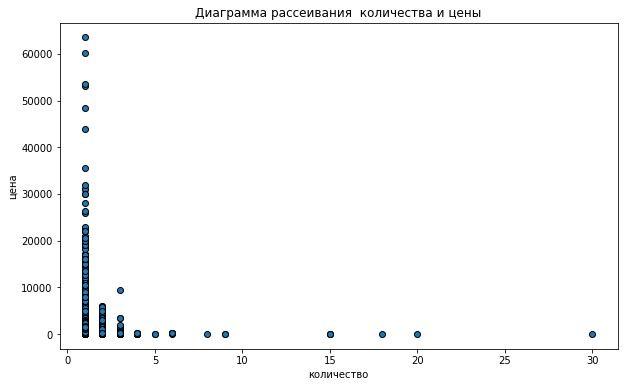

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(apparel_purchases['quantity'], apparel_purchases['price'],\
            edgecolors="black")
plt.title('Диаграмма рассеивания  количества и цены')
plt.xlabel('количество')
plt.ylabel('цена')


plt.show
None

Оценим распределение количества заказов во времени

In [15]:
df = apparel_purchases.groupby('date').agg({'quantity': ['sum']})

In [16]:
df.head()

,quantity
,sum
date,
2022-10-26,13
2022-10-27,21
2022-10-28,20
2022-10-29,11
2022-10-30,24


In [17]:
print('Начало периода:', df.index.min())
print('Конец периода:', df.index.max())

Начало периода: 2022-10-26 00:00:00
Конец периода: 2023-10-26 00:00:00


В нашем распоряжении данные за год.

In [18]:
df.head()

,quantity
,sum
date,
2022-10-26,13
2022-10-27,21
2022-10-28,20
2022-10-29,11
2022-10-30,24


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-10-26 to 2023-10-26
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   (quantity, sum)  366 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


<Figure size 1500x800 with 0 Axes>

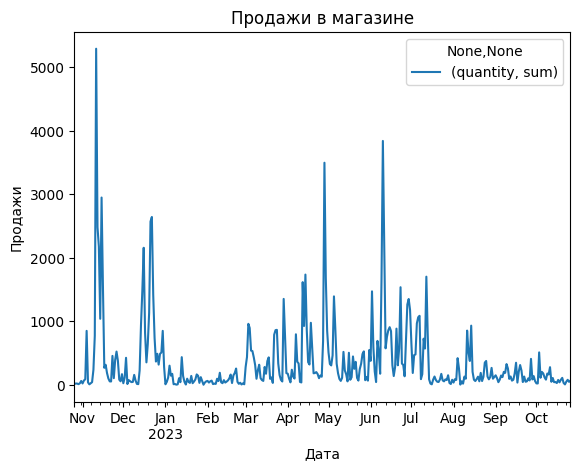

In [77]:

# Построим график продаж
plt.figure(figsize=(15,8))
df.plot()
plt.title('Продажи в магазине')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()


In [21]:

# Проведем тест Дики-Фуллера на стационарность
result = adfuller(df['quantity'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
None

ADF Statistic: -5.190296
p-value: 0.000009
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


На выходе мы получим статистику теста Дики-Фуллера и p-значение. Если p-значение меньше уровня значимости (обычно 0.05), то мы можем отклонить нулевую гипотезу о нестационарности ряда и считать его стационарным.

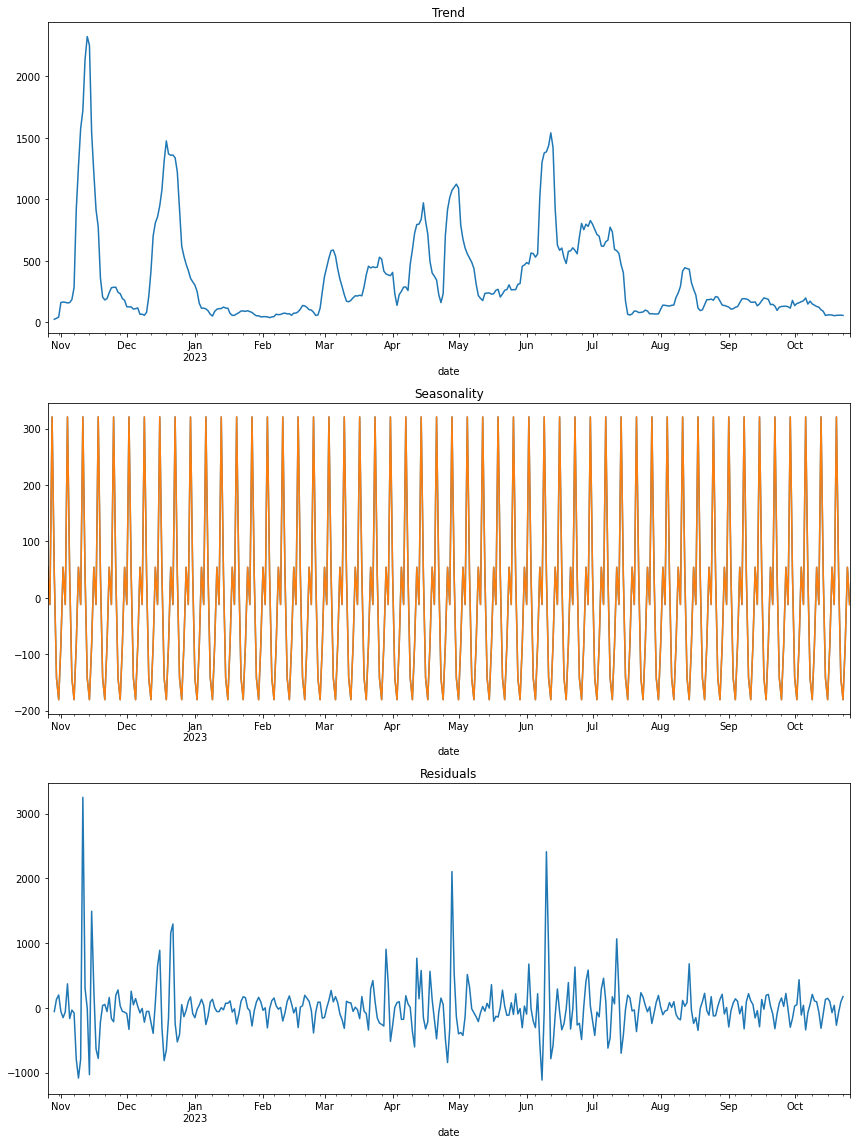

In [22]:
decomposed = seasonal_decompose(df)

plt.figure(figsize=(12, 16))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()


In [ ]:
# df.hist()

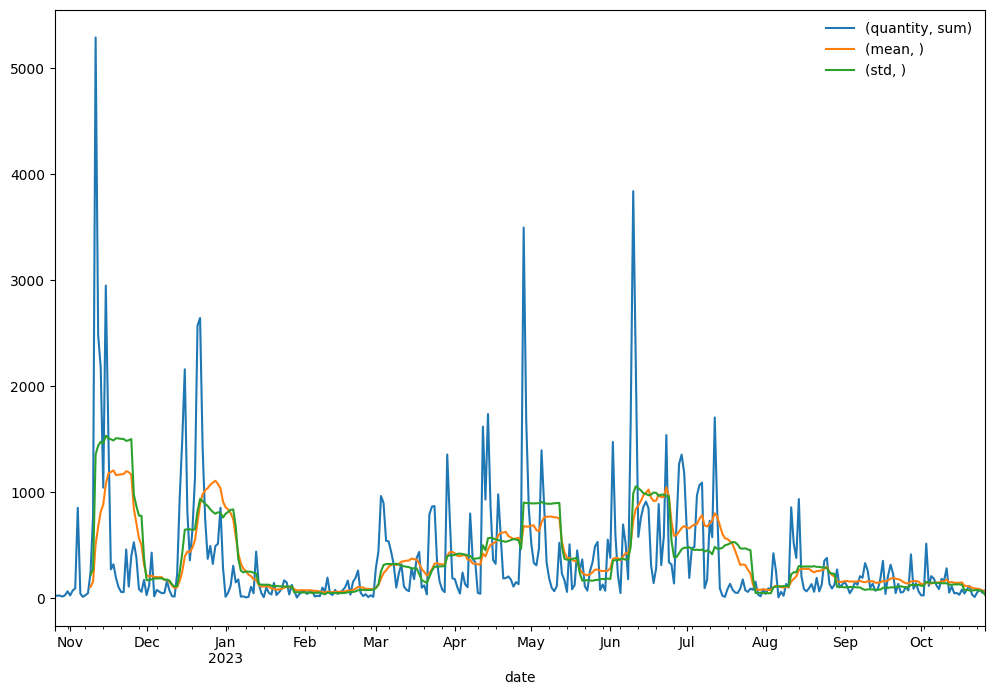

In [79]:
data_research = df.copy()
data_research['mean'] = data_research['quantity'].rolling(15).mean()
data_research['std'] = data_research['quantity'].rolling(15).std()

plt.figure(figsize=(12, 8))
data_research.plot(ax=plt.gca())
plt.legend(loc='upper right', frameon=False)

None

In [23]:
# определим последнюю дату покупки
print('Дата последней покупки:', max(apparel_purchases['date']))

Дата последней покупки: 2023-10-26 00:00:00


От этой даты начнём рассчитывать 30 дней. Всем клиентам, совершившим покупку с 2023-09-26 до 2023-10-26, присвоим значение таргета 1.

In [73]:
def plot_sales_statistics(data):
    # Преобразование столбца 'date' в тип datetime
    data['date'] = pd.to_datetime(data['date'])

    # Извлечение месяца из столбца 'date'
    data['month'] = data['date'].dt.to_period('M')

    # Группировка данных по месяцам и подсчет числа продаж
    sales_per_month = data.groupby('month').size().reset_index(name='count')

    # Группировка данных по месяцам и вычисление суммы цен продаж
    total_sales_per_month = data.groupby('month')['price'].sum().reset_index(name='total_price')
    
    plt.style.use('default')
    plt.rcParams.update({"grid.linewidth":0.3, "grid.alpha":0.5})
    # Создание общего рисунка и подграфиков
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    # Построение графика числа продаж по месяцам
    sns.barplot(x='month', y='count', data=sales_per_month, color='skyblue', ax=ax1)
    ax1.set_title('Количество  продаж за месяц')
    ax1.set_xticklabels(sales_per_month['month'], rotation=45)
    ax1.set_xlabel('Месяц')
    ax1.set_ylabel('Количество продаж')

    # Построение графика суммарной стоимости продаж по месяцам
    sns.barplot(x='month', y='total_price', data=total_sales_per_month, color='salmon', ax=ax2)
    ax2.set_title('Ежемесячный объем продаж')
    ax2.set_xticklabels(total_sales_per_month['month'], rotation=45)
    ax2.set_xlabel('Месяц')
    ax2.set_ylabel('Сумма продаж за месяц')
    
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data['date'].dt.to_period('M')

    # Найдем новых клиентов для каждого месяца
    first_purchase_per_customer = data.groupby('client_id')['month'].min().reset_index()
    new_customers_per_month = first_purchase_per_customer.groupby('month').size().reset_index(name='new_customers')
    #new_customers_per_month = data.drop_duplicates('client_id').groupby('month').size().reset_index(name='new_customers')

    # Найдем общее количество клиентов для каждого месяца
    total_customers_per_month = data.groupby('month')['client_id'].nunique().reset_index(name='total_customers')

    # Объединим данные по новым и общим клиентам
    customers_data = pd.merge(total_customers_per_month, new_customers_per_month, on='month')

    sns.set_color_codes("pastel")
    sns.barplot(x='month', y='new_customers', data=customers_data, label='Новые покупатели', color='b', alpha=0.7, ax=ax3)

    sns.set_color_codes("muted")
    sns.barplot(x='month', y='total_customers', data=customers_data, label='Всего покупателей', color='b', alpha=0.7, ax=ax3)

    ax3.set_title('Уникальные покупатели и новые покупатели')
    ax3.set_xticklabels(total_sales_per_month['month'], rotation=45)
    ax3.set_xlabel('Месяц')
    ax3.set_ylabel('Количество покупателей')
    ax3.legend(loc='upper left', frameon=False)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4)  # Увеличиваем расстояние между подграфиками
    plt.show()

(133104, 7)


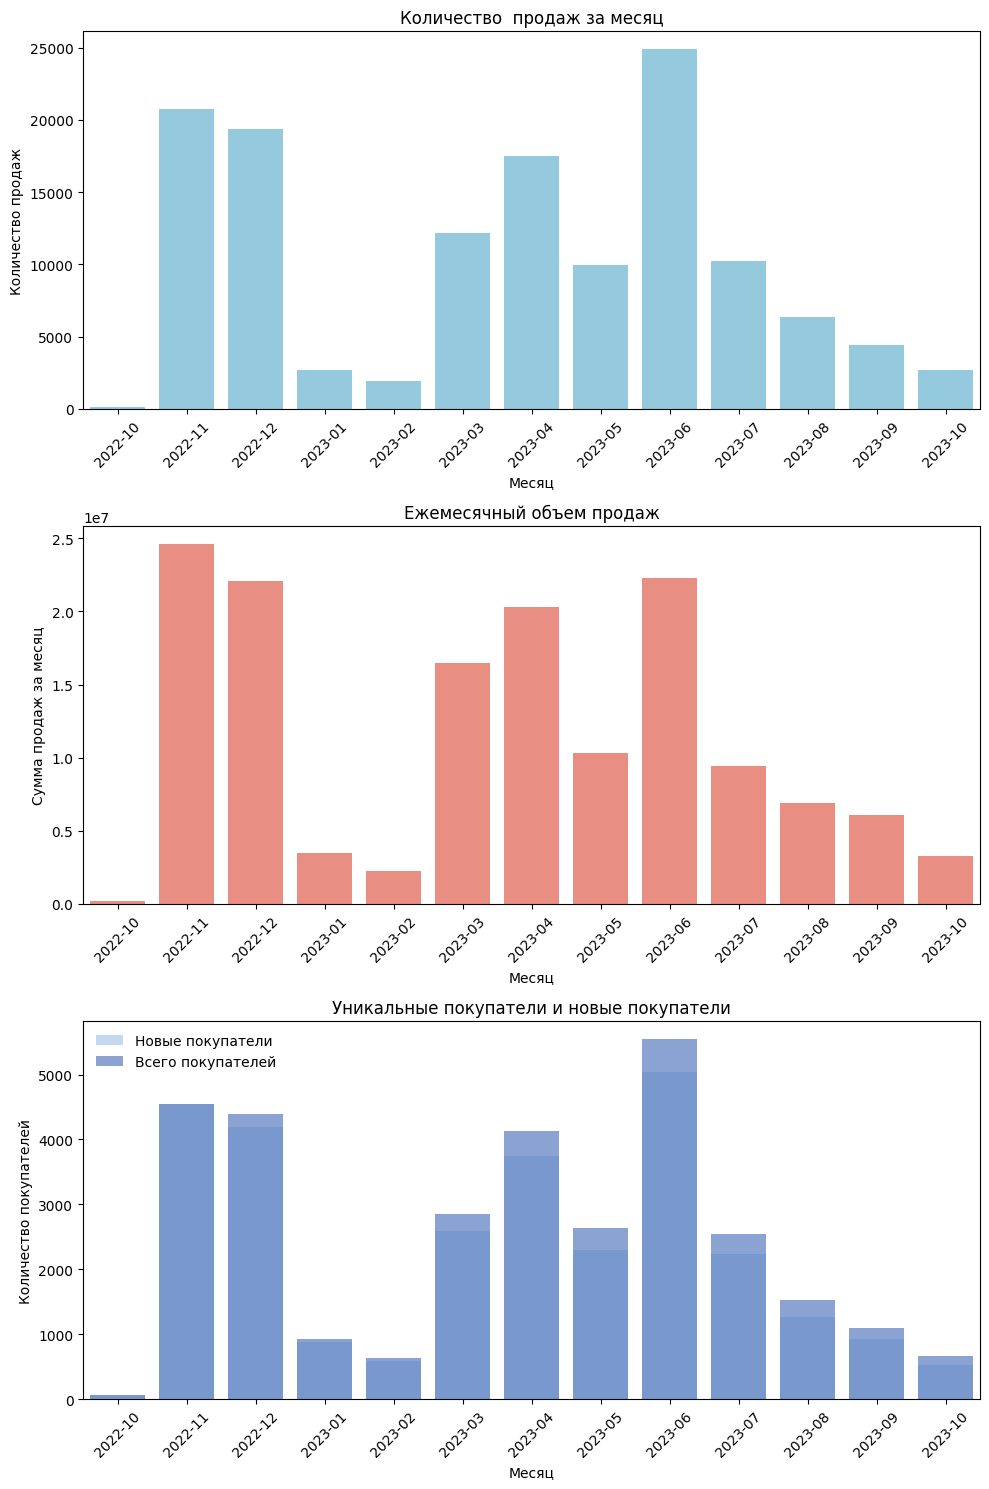

Timestamp('2022-10-26 00:00:00')

Timestamp('2023-10-26 00:00:00')

,client_id,quantity,price,date,message_id,recommended_by,month
0,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09


In [74]:
print(apparel_purchases.shape)
plot_sales_statistics(apparel_purchases)
display(apparel_purchases['date'].min(), apparel_purchases['date'].max())
apparel_purchases.head(1)

In [33]:
# Преобразование столбца 'date' в тип datetime
apparel_purchases['date'] = pd.to_datetime(apparel_purchases['date'])


In [34]:
# Извлечение месяца из столбца 'date'
apparel_purchases['month'] = apparel_purchases['date'].dt.to_period('M')
apparel_purchases.head()

,client_id,quantity,price,date,message_id,recommended_by,month
0,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09
1,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09
2,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09
3,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09
4,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09


In [41]:
# Группировка данных по месяцам и подсчет числа продаж
sales_per_month = apparel_purchases.groupby('month').size().reset_index(name='count')
sales_per_month.head()

,month,count
0,2022-10,150
1,2022-11,20732
2,2022-12,19382
3,2023-01,2680
4,2023-02,1900


In [44]:
# Группировка данных по месяцам и вычисление суммы цен продаж
total_sales_per_month = apparel_purchases.groupby('month')['price'].sum().reset_index(name='total_price')
total_sales_per_month.head()

,month,total_price
0,2022-10,210954.0
1,2022-11,24575900.0
2,2022-12,22103787.0
3,2023-01,3512246.0
4,2023-02,2249945.0


In [45]:

# Преобразование столбца 'date' в тип datetime
apparel_purchases['date'] = pd.to_datetime(data['date'])

# Извлечение месяца из столбца 'date'
data['month'] = data['date'].dt.to_period('M')

    # Группировка данных по месяцам и подсчет числа продаж
    sales_per_month = data.groupby('month').size().reset_index(name='count')

    # Группировка данных по месяцам и вычисление суммы цен продаж
    total_sales_per_month = data.groupby('month')['price'].sum().reset_index(name='total_price')
    
   # plt.style.use('dark_background')
    plt.rcParams.update({"grid.linewidth":0.3, "grid.alpha":0.5})
    # Создание общего рисунка и подграфиков
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Построение графика числа продаж по месяцам
    sns.barplot(x='month', y='count', data=sales_per_month, color='skyblue', ax=ax1)
    ax1.set_title('Количество  продаж за месяц')
    ax1.set_xticklabels(sales_per_month['month'], rotation=45)
    ax1.set_xlabel('Месяц')
    ax1.set_ylabel('Количество продаж')

    # Построение графика суммарной стоимости продаж по месяцам
    sns.barplot(x='month', y='total_price', data=total_sales_per_month, color='salmon', ax=ax2)
    ax2.set_title('Ежемесячный объем продаж')
    ax2.set_xticklabels(total_sales_per_month['month'], rotation=45)
    ax2.set_xlabel('Месяц')
    ax2.set_ylabel('Сумма продаж за месяц')
    
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data['date'].dt.to_period('M')

    # Найдем новых клиентов для каждого месяца
    first_purchase_per_customer = data.groupby('client_id')['month'].min().reset_index()
    new_customers_per_month = first_purchase_per_customer.groupby('month').size().reset_index(name='new_customers')
    #new_customers_per_month = data.drop_duplicates('client_id').groupby('month').size().reset_index(name='new_customers')

    # Найдем общее количество клиентов для каждого месяца
    total_customers_per_month = data.groupby('month')['client_id'].nunique().reset_index(name='total_customers')

    # Объединим данные по новым и общим клиентам
    customers_data = pd.merge(total_customers_per_month, new_customers_per_month, on='month')

    sns.set_color_codes("pastel")
    sns.barplot(x='month', y='new_customers', data=customers_data, label='Новые покупатели', color='b', alpha=0.7, ax=ax3)

    sns.set_color_codes("muted")
    sns.barplot(x='month', y='total_customers', data=customers_data, label='Всего покупателей', color='b', alpha=0.7, ax=ax3)

    ax3.set_title('Уникальные покупатели и новые покупатели')
    ax3.set_xticklabels(total_sales_per_month['month'], rotation=45)
    ax3.set_xlabel('Месяц')
    ax3.set_ylabel('Количество покупателей')
    ax3.legend(loc='upper left', frameon=False)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4)  # Увеличиваем расстояние между подграфиками
    plt.show()

IndentationError: unexpected indent (4038931746.py, line 8)